In [92]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.model_selection import GridSearchCV

In [14]:
X_train = pd.read_csv("../J1/X_train_clean.csv")
X_test = pd.read_csv("../J1/X_test_clean.csv")
y_train = pd.read_csv("../J1/y_train.csv")
y_test = pd.read_csv("../J1/y_test.csv")

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 17)
(61, 17)
(242, 1)
(61, 1)


# Classification k-NN

In [17]:
#hyperparameters_knn
n_neighbors=5
weights='uniform'
algorithm='auto'
leaf_size=30
p=2
metric='minkowski'

In [18]:
model_knn = KNeighborsClassifier(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p,
    metric=metric,
)

In [19]:
model_knn

KNeighborsClassifier()

#### Entraînement du modèle

In [34]:
model_knn.fit(X_train.values, y_train.values.ravel())

KNeighborsClassifier()

#### Prédictions
https://github.com/scikit-learn/scikit-learn/issues/26768  
Bug avec scikit-learn 1.3.0 : predict ne prend en argument qu'un numpy array et non un pandas DataFrame.  
Avec scikit-learn < 1.3.0:
```
y_pred = model_knn.predict(X_test)
```

In [36]:
y_pred = model_knn.predict(X_test.values)

#### Évaluation du modèle

In [39]:
accuracy_score(y_pred, y_test)

0.7868852459016393

## Recherche des meilleurs hyperparamètres avec GridSearchCV

In [43]:
"""
hyperparameters = {
    "n_neighbors" : list(range(3,20)),
    "weights"     : ["uniform", "distance"],
    "algorithm"   : ["ball_tree", "kd_tree"],
    "p"           : list(range(2,5))
}
"""

# Avec gestion des combinaisons d'hyperparamètres :
hyperparameters = [
    {
        "n_neighbors" : list(range(3,20)),
        "weights"     : ["uniform", "distance"],
        "algorithm"   : ["ball_tree", "kd_tree"],
        "p"           : list(range(2,5)),
        "distance"    : "minkowski"
    },
    {
        "n_neighbors" : list(range(3,20)),
        "weights"     : ["uniform", "distance"],
        "algorithm"   : ["ball_tree", "kd_tree"],
        "distance"    : "manhattan"
    },
]

In [48]:
gscv_knn = GridSearchCV(
    estimator = model_knn,
    param_grid = hyperparameters,
    cv = 5,
    scoring = "f1",
    verbose = 4
)

In [49]:
gscv_knn.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 204 candidates, totalling 1020 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=0.723 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=0.766 total time=   0.0s
[CV 5

[CV 5/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=uniform;, score=0.744 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=distance;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=distance;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=distance;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, p=4, weights=distance;, score=0.744 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, p=2, weights=uniform;, score=0.762 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, p=2, weights=unifor

[CV 4/5] END algorithm=ball_tree, n_neighbors=8, p=3, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, p=3, weights=distance;, score=0.744 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=uniform;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=uniform;, score=0.791 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=uniform;, score=0.762 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=distance;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=distance;, score=0.683 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, p=4, weights=distanc

[CV 4/5] END algorithm=ball_tree, n_neighbors=11, p=3, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=11, p=3, weights=distance;, score=0.756 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=uniform;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=uniform;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=uniform;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=distance;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=11, p=4, weights=distance;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=11, p=4, weigh

[CV 2/5] END algorithm=ball_tree, n_neighbors=14, p=3, weights=distance;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, p=3, weights=distance;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, p=3, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, p=3, weights=distance;, score=0.756 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, p=4, weights=uniform;, score=0.864 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, p=4, weights=uniform;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, p=4, weights=uniform;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, p=4, weights=uniform;, score=0.791 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, p=4, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, p=4, weigh

[CV 3/5] END algorithm=ball_tree, n_neighbors=17, p=3, weights=distance;, score=0.837 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=17, p=3, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=17, p=3, weights=distance;, score=0.727 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=uniform;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=uniform;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=uniform;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=uniform;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=17, p=4, weights=distance;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=17, p=4, weigh

[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=uniform;, score=0.723 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=uniform;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=distance;, score=0.864 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=distance;, score=0.744 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=distance;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, p=3, weights=distance;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=4, weights=uniform;, score=0.864 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=4, weights=uniform;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=4, weights=uniform;, score=0.744 tota

[CV 1/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=uniform;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=uniform;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=uniform;, score=0.762 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=uniform;, score=0.810 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=distance;, score=0.844 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=distance;, score=0.744 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=distance;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=6, p=4, weights=distance;, score=0.744 tota

[CV 1/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=uniform;, score=0.870 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=uniform;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=uniform;, score=0.857 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=uniform;, score=0.773 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=distance;, score=0.870 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=distance;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=distance;, score=0.857 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, p=4, weights=distance;, score=0.773 tota

[CV 2/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=uniform;, score=0.791 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=uniform;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance;, score=0.870 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance;, score=0.837 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance;, score=0.756 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=12, p=4, weights=uniform;, score=

[CV 5/5] END algorithm=kd_tree, n_neighbors=15, p=2, weights=distance;, score=0.756 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=uniform;, score=0.864 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=uniform;, score=0.762 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=uniform;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=uniform;, score=0.766 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=distance;, score=0.864 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=distance;, score=0.762 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=distance;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=15, p=3, weights=distance;, score=

[CV 4/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=uniform;, score=0.810 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=uniform;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=distance;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=distance;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=distance;, score=0.837 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=18, p=3, weights=distance;, score=0.727 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, p=4, weights=uniform;, score=0.889 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=18, p=4, weights=uniform;, score=0.732 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=18, p=4, weights=uniform;, score=

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19],
                         'p': [2, 3, 4], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=4)

In [50]:
best_knn = gscv_knn.best_estimator_

In [51]:
best_knn_hyperparameters = gscv_knn.best_params_

In [52]:
best_knn_hyperparameters

{'algorithm': 'ball_tree', 'n_neighbors': 16, 'p': 2, 'weights': 'distance'}

In [62]:
y_pred = best_knn.predict(X_test)

In [68]:
print("Accuracy  :", accuracy_score(y_pred, y_test.values))
print("Precision :", precision_score(y_pred, y_test.values))
print("Recall    :", recall_score(y_pred, y_test.values))
print("F1        :", f1_score(y_pred, y_test.values))

Accuracy  : 0.8360655737704918
Precision : 0.8214285714285714
Recall    : 0.8214285714285714
F1        : 0.8214285714285714


In [72]:
cm = confusion_matrix(y_pred, y_test.values)

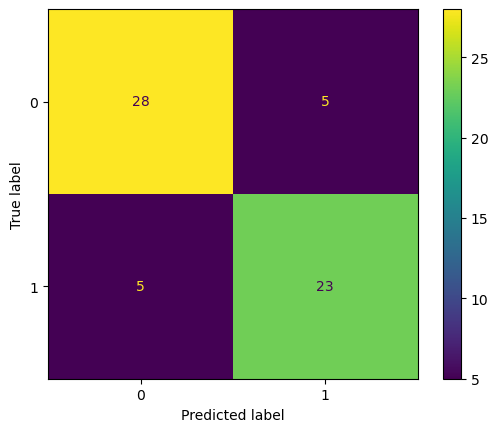

In [74]:
cmd = ConfusionMatrixDisplay(confusion_matrix = cm)
cmd.plot()

In [77]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



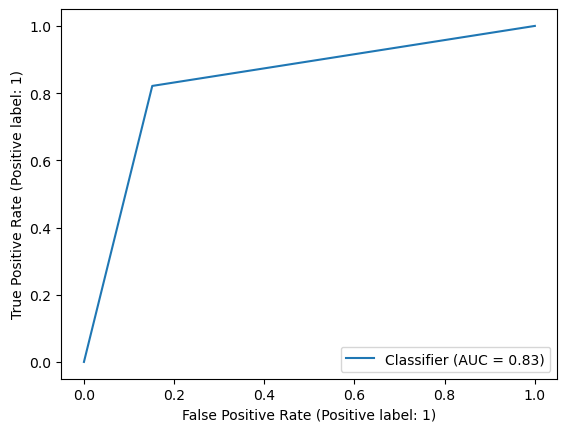

In [87]:
RocCurveDisplay.from_predictions(y_test, y_pred)

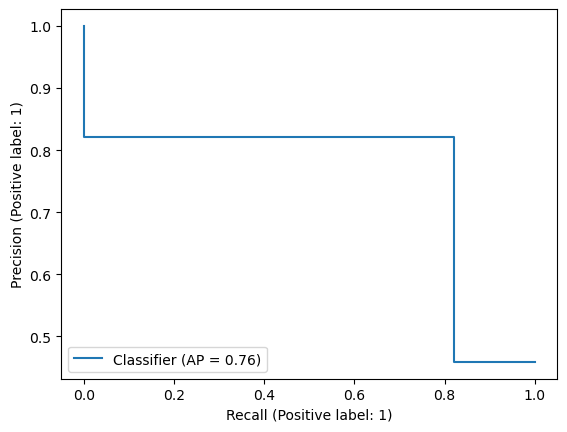

In [88]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)